## Spam Detection Model

In [28]:
# Import pandas
import pandas as pd
# Import numpy
import numpy as np
# Import the required dependencies from sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Set the column width to view the text message data.
pd.set_option('max_colwidth', 200)

def load_and_prepare_data(file_path):
    """Load and prepare the SMS dataset"""
    sms_text_df = pd.read_csv(file_path)
    print("Dataset Shape:", sms_text_df.shape)
    print("\nClass Distribution:")
    print(sms_text_df['label'].value_counts(normalize=True))
    
    return sms_text_df

def create_and_train_model(X_train, X_test, y_train, y_test):
    """Create and train the spam detection model"""
# Create pipeline
    text_clf = Pipeline([
        ('tfidf', TfidfVectorizer(
            stop_words='english',
            min_df=5,  # Ignore terms that appear in less than 5 documents
            max_features=5000,  # Limit features to top 5000 terms
            ngram_range=(1, 2)  # Include both unigrams and bigrams
        )),
        ('clf', LinearSVC(
            C=1.0,
            class_weight='balanced',  # Handle class imbalance
            random_state=42
        )),
    ])
# Train the model
    text_clf.fit(X_train, y_train)
# Evaluate the model
    print("\nModel Performance:")
    print('Train Accuracy: %.3f' % text_clf.score(X_train, y_train))
    print('Test Accuracy: %.3f' % text_clf.score(X_test, y_test))
# Perform cross-validation
    cv_scores = cross_val_score(text_clf, X_train, y_train, cv=5)
    print('\nCross-validation scores:', cv_scores)
    print('Average CV score: %.3f (+/- %.3f)' % (cv_scores.mean(), cv_scores.std() * 2))
    
    return text_clf

 Model performance and preparation for deployment

In [29]:
# Evaluate the model performance
def evaluate_model_performance(model, X_test, y_test):
    """Generate detailed model performance metrics"""
    y_pred = model.predict(X_test)
    
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Create custom messages to test the model
def test_custom_messages(model, messages):
    """Test the model with custom messages"""
    print("\nPredictions for Custom Messages:")
    for msg in messages:
        prediction = model.predict([msg])[0]
        probability = model.decision_function([msg])[0]
        print(f"\nMessage: {msg}")
        print(f"Prediction: {prediction}")
        print(f"Decision function score: {probability:.2f}")


Model creation, testing , and validation**

Dataset Shape: (5572, 2)

Class Distribution:
label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64


c:\Users\Busin\anaconda5\envs\dev\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



Model Performance:
Train Accuracy: 0.997
Test Accuracy: 0.979


c:\Users\Busin\anaconda5\envs\dev\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Busin\anaconda5\envs\dev\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Busin\anaconda5\envs\dev\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Busin\anaconda5\envs\dev\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Busin\anaconda5


Cross-validation scores: [0.96921017 0.97188755 0.96117805 0.98793566 0.97855228]
Average CV score: 0.974 (+/- 0.018)

Detailed Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1593
        spam       0.91      0.94      0.92       246

    accuracy                           0.98      1839
   macro avg       0.95      0.96      0.96      1839
weighted avg       0.98      0.98      0.98      1839



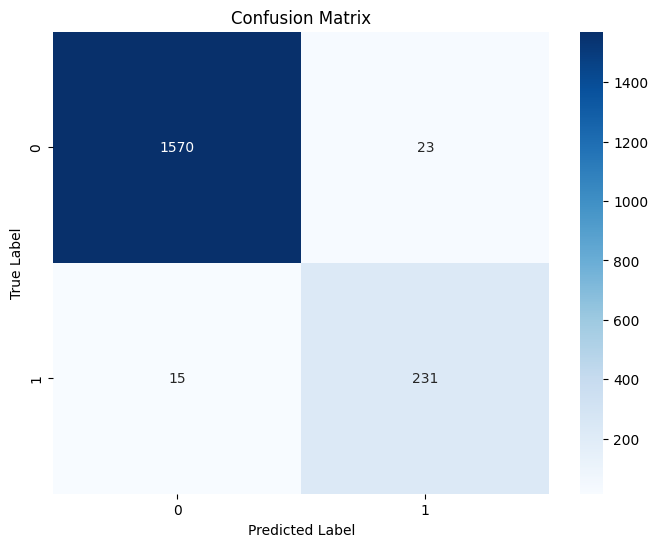


Predictions for Custom Messages:

Message: You are a lucky winner of $5000!!
Prediction: ham
Decision function score: -0.23

Message: You won 2 free tickets to the Super Bowl.
Prediction: spam
Decision function score: 0.43

Message: You won 2 free tickets to the Super Bowl text us to claim your prize
Prediction: spam
Decision function score: 1.59

Message: Thanks for registering. Text 4343 to receive free updates on medicare
Prediction: spam
Decision function score: 0.51

Message: Hey, can we meet at 6pm tomorrow?
Prediction: ham
Decision function score: -1.43

Message: Your account has been compromised. Click here to verify.
Prediction: ham
Decision function score: -0.69


In [30]:
# Main function
def main():
    # Load and prepare data
    sms_text_df = load_and_prepare_data('Resources/SMSSpamCollection.csv')
    
    # Split features and target
    X = sms_text_df['text_message']
    y = sms_text_df['label']
    
# Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42
    )
    
    # Create and train model
    model = create_and_train_model(X_train, X_test, y_train, y_test)
    
    # Evaluate model performance
    evaluate_model_performance(model, X_test, y_test)
    
    # Test custom messages
    test_messages = [
        "You are a lucky winner of $5000!!",
        "You won 2 free tickets to the Super Bowl.",
        "You won 2 free tickets to the Super Bowl text us to claim your prize",
        "Thanks for registering. Text 4343 to receive free updates on medicare",
        "Hey, can we meet at 6pm tomorrow?",  # Additional legitimate message
        "Your account has been compromised. Click here to verify."  # Additional spam message
    ]
    
    test_custom_messages(model, test_messages)

if __name__ == "__main__":
    main()

In [20]:
# Load the dataset into a DataFrame
sms_text_df = pd.read_csv('Resources/SMSSpamCollection.csv')
sms_text_df.head()

,label,text_message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [21]:
# Check for missing values. 
sms_text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   label         5572 non-null   object
 1   text_message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [22]:
#  Get the number of "ham" and "spam" from the "label" column:
sms_text_df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

## Split the data into train & test sets:

In [18]:
# Set the features variable to the text message. 
X = sms_text_df['text_message']  
# Set the target variable to the "label" column.
y = sms_text_df['label']

# Split data into training and testing and set the test_size = 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Build a Pipeline with the vectorizer and SVM model. 

In [ ]:
# Build a pipeline to transform the test set to compare to the training set. 
text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                     ('clf', LinearSVC()),
])

# Fit the model to the transformed data.
text_clf.fit(X_train, y_train)  


c:\Users\Busin\anaconda5\envs\dev\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', LinearSVC())])

In [7]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % text_clf.score(X_train, y_train))
print('Test Accuracy: %.3f' % text_clf.score(X_test, y_test))

Train Accuracy: 1.000
Test Accuracy: 0.989


## Test the classifier and display results

In [8]:
# Create some random text messages. 
text_1 = """You are a lucky winner of $5000!!"""
text_2 = """You won 2 free tickets to the Super Bowl."""
text_3 = """You won 2 free tickets to the Super Bowl text us to claim your prize"""
text_4 = """Thanks for registering. Text 4343 to receive free updates on medicare"""

In [9]:
# Send the text messages to transform the data and predict the classification.
print(text_clf.predict([text_1]))
print(text_clf.predict([text_2]))
print(text_clf.predict([text_3]))
print(text_clf.predict([text_4]))

['ham']
['ham']
['spam']
['spam']


In [ ]:
if "spam" in text_clf.predict([text_1]):
    print("This is a spam message")
else: 
    print("This is not a spam message")

This is not a spam message
